In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/Indian_Kids_Screen_Time.csv')

In [6]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [ ]:
df.tail()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,True,0.33,Anxiety,Urban


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [ ]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [ ]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [ ]:
df.duplicated().sum()

44

In [ ]:
df.dtypes

Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

In [ ]:
df.shape

(9712, 8)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

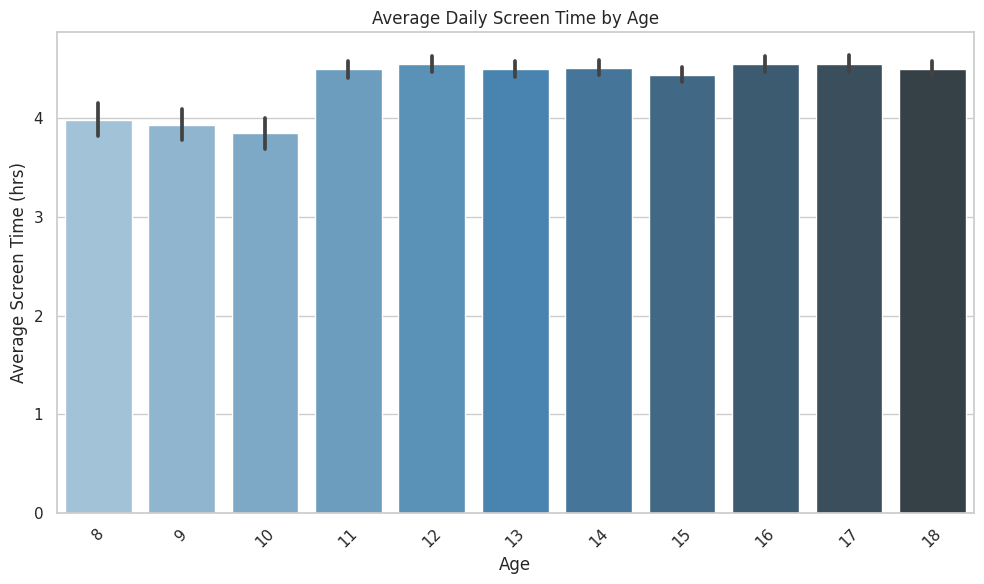

In [ ]:
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Average Screen Time by Age
sns.barplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, palette='Blues_d')
plt.title('Average Daily Screen Time by Age')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (hrs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

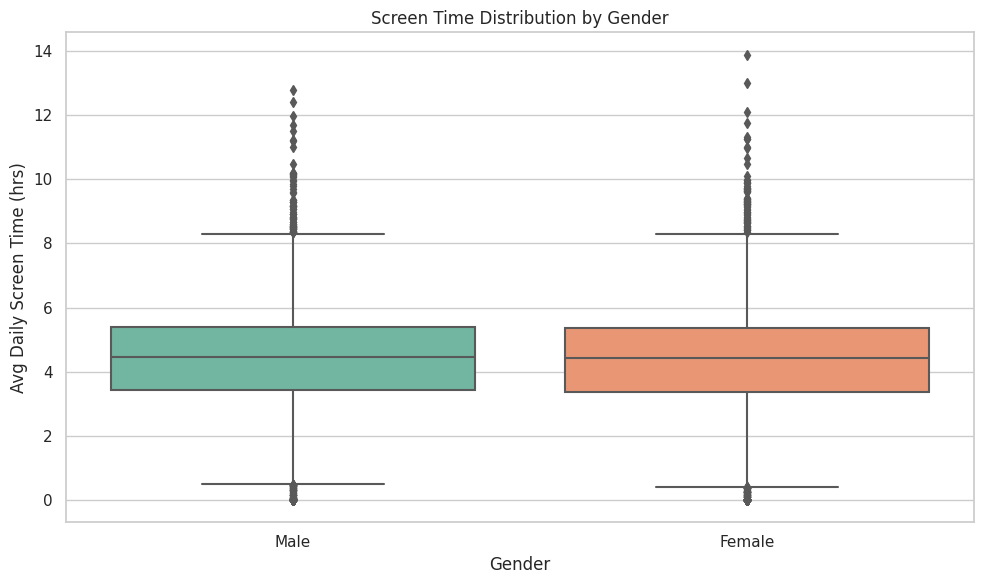

In [ ]:
# 2. Screen Time Distribution by Gender
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, palette='Set2')
plt.title('Screen Time Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Daily Screen Time (hrs)')
plt.tight_layout()
plt.show()

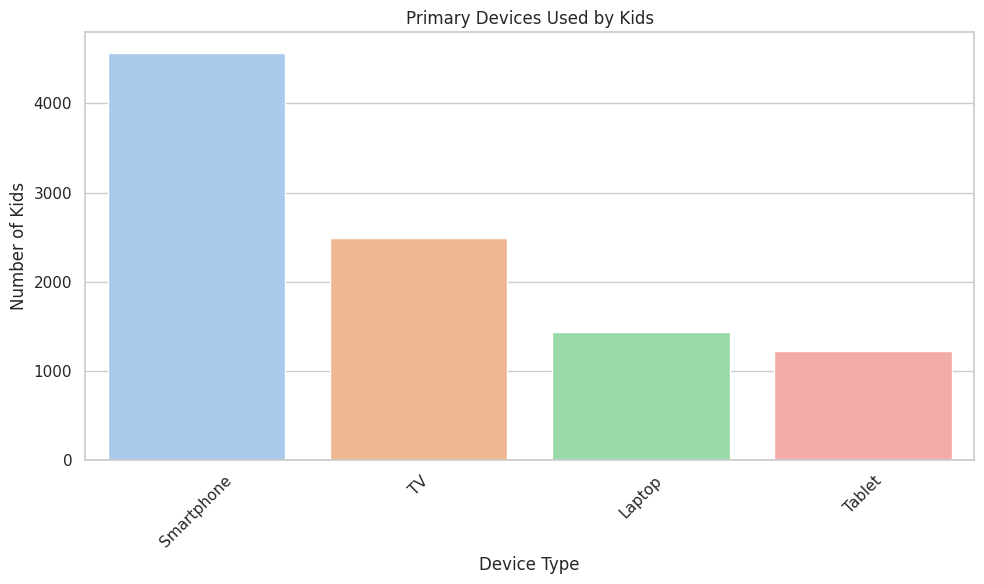

In [ ]:
# 3. Primary Device Usage
sns.countplot(data=df, x='Primary_Device', order=df['Primary_Device'].value_counts().index, palette='pastel')
plt.title('Primary Devices Used by Kids')
plt.xlabel('Device Type')
plt.ylabel('Number of Kids')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

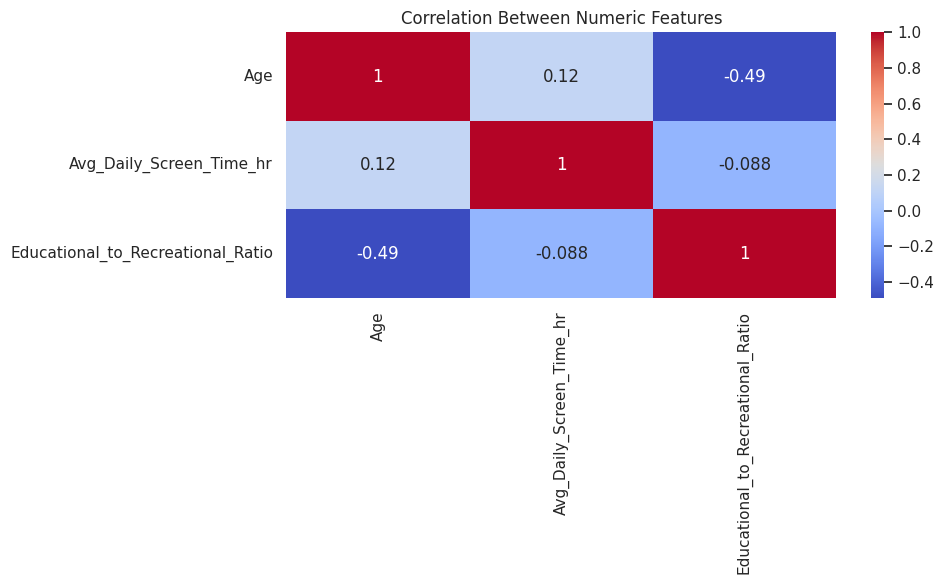

In [ ]:
corr = df[['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
categorical_cols = ['Gender', 'Primary_Device', 'Health_Impacts', 'Urban_or_Rural', 'Exceeded_Recommended_Limit']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop('Exceeded_Recommended_Limit', axis=1)
y = df['Exceeded_Recommended_Limit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

Logistic Regression: 97.63% accuracy
Random Forest: 100.00% accuracy
Decision Tree: 100.00% accuracy
Naive Bayes: 83.63% accuracy
SVM: 98.25% accuracy
KNN: 98.61% accuracy


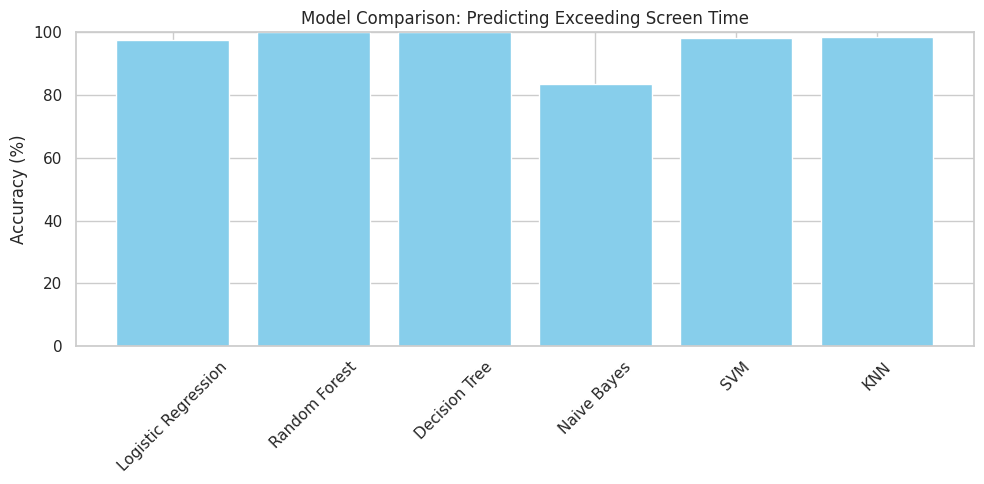

In [ ]:
# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc * 100  # percentage

# Show accuracy results
for model, acc in results.items():
    print(f"{model}: {acc:.2f}% accuracy")

# Bar chart of results
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison: Predicting Exceeding Screen Time')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()